##  "Problem 1" Determine the initial value of the center point

In [1]:
from sklearn.datasets import make_blobs  
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
n_clusters = 4
myu = X[np.random.choice(len(X),size=n_clusters,replace=False)]

In [4]:
print(myu)

[[-1.64996061  7.49068513]
 [-1.47602203  7.8441996 ]
 [ 0.99914934  4.2101954 ]
 [ 2.25643834  0.55525861]]


## Problem 2 -6

In [5]:
class ScratchKMeans():
    """
    Implementation of K-means cluster

    Parameters
    ----------
    n_clusters : int
      number of class
    n_init : int
      How many times to change the initial value of the center point to calculate
    max_iter : int
      How many iterations can be done in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol= 1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

        self.record_myu = None
        self.record_cluster = None


    def fit(self, X):
        """
        Calculate clustering by K-means

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        """

        for i in range(self.n_init):
          self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
          for j in range(self.max_iter):
            self._update_cluster(X)
            old_myu = self.myu
            self._update_myu(X)

            if np.sum(old_myu - self.myu) < self.tol:
              self.calc_sse(X)
              break
            
            self.calc_sse(X)

        #fig = plt.subplots(figsize = (10,8))
        #plt.rcParams['font.size'] = 20
        #for i in range(self.n_clusters):
        #    plt.scatter(X[X_cluster[:,-1]==i,0],X[X_cluster[:,-1]==i,1], s=80)
        #plt.scatter(self.myu[:,0], self.myu[:,1], s = 100)
        #plt.show()

    def calc_sse(self,X):
        """
        Calculate SSE(Sum of Squared Error)
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features + 1)
            Features of training data
        """
        self.best_sse = 10**20
        sse = 0

        diff = (X-self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff, ord= 2, axis=1).reshape(self.n_clusters, -1).T
        sse = np.sum(np.min(self.dist, axis=1)**2)
        
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
            self._silhouette(X) if self.n_clusters >=2 else _
            

    def _update_cluster(self,X):
        """
        Assignment to the cluster

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features + 1)
            Features of training data
        """

        diff = (X - self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff, ord = 2, axis= 1).reshape(self.n_clusters,-1).T
        self.cluster = np.argmin(self.dist, axis=1)

    def _update_myu(self,X):
        """
        Moving the center point by update value of mu.
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        """

        for j in range(self.n_clusters):
           self.myu[j] = np.mean(X[self.cluster == j],axis=0)
    
    def _silhouette(self, X):
      """
      silhouette diagram to help determine k.

      Parameters
      -------------------
      X : ndarray, shape (n_samples, n_features)
            Features of training data
      """
      ab = np.zeros([len(X),2])

      self.silhouette_vals = np.zeros(len(X))

      for i,j in enumerate(X):
        ab[i,0] = np.sum(np.linalg.norm(j-X[self.cluster == self.cluster[i]], ord=2,axis=1))/len(X[len(X[self.cluster == self.cluster[i]])]-1)
        ab[i,1] = np.mean(np.linalg.norm(j-X[self.cluster == self.dist[i].argsort()[1]], ord=2, axis=1))

        self.silhouette_vals[i] = (ab[i,1] - ab[i,0])/np.max(ab[i])
      
      self.silhouette_avg = np.mean(self.silhouette_vals)
      self.y_km = self.cluster
      self.cluster_labels = np.unique(self.cluster)


    def predict(self, X):
        """
        Calculate which cluster the entered data belongs to
        """
        diff = (X- self.record_myu[:,None]).reshape(-1,2)
        dist = np.linalg.norm(diff, ord=2, axis=1).reshape(self.record_cluster,-1).T
        return np.argmin(dist, axis = 1)

## [Problem 7] Estimate

In [6]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

print("X shape: {} and type: {}".format(X.shape, type(X)))

X_train, X_valid = train_test_split(X,train_size=0.8,random_state=None)

X shape: (100, 2) and type: <class 'numpy.ndarray'>


In [7]:
clf = ScratchKMeans(n_clusters=4,n_init=5,max_iter=100,verbose=True)
clf.fit(X_train)
pred = clf.predict(X_valid)
print(pred)

[3 3 1 0 1 1 3 0 1 0 3 1 1 3 1 1 2 2 1 0]


## [Problem 8] Implementation of elbow method

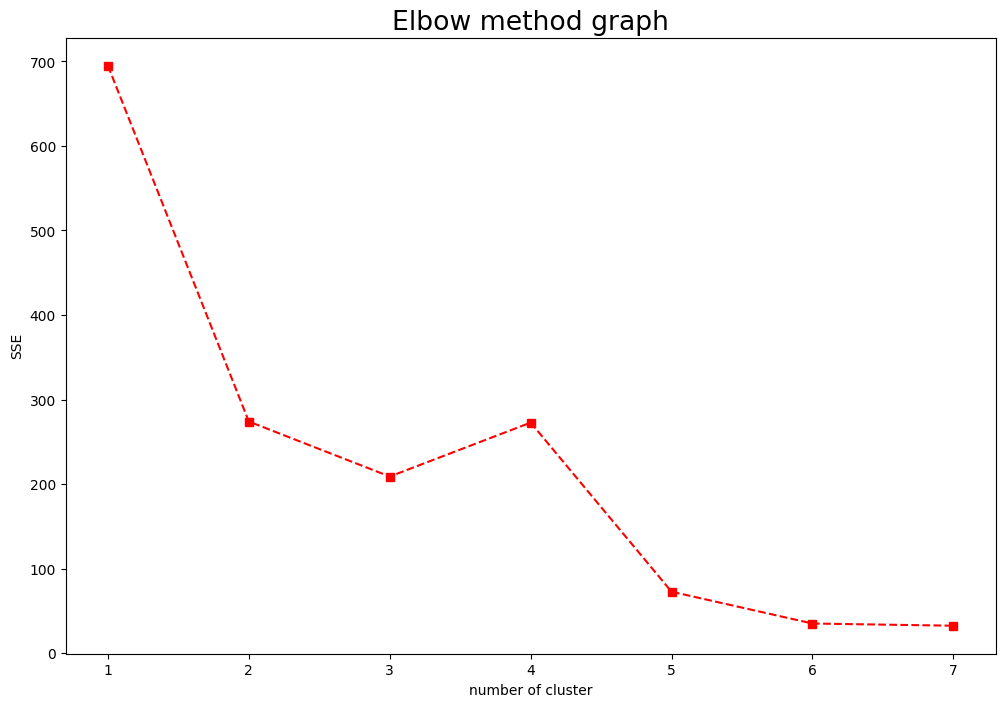

In [8]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,max_iter=100,verbose=False)
    model.fit(X_train)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 16
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--')
plt.title("Elbow method graph")
plt.xlabel('number of cluster')
plt.ylabel("SSE")
plt.show()

# Wholesaler data analysis

In [9]:
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv('../data/wholesaler/wcdata.csv')
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [11]:
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

## [Problem 10] Selection of the number of clusters k

[0.44082893 0.72459292]


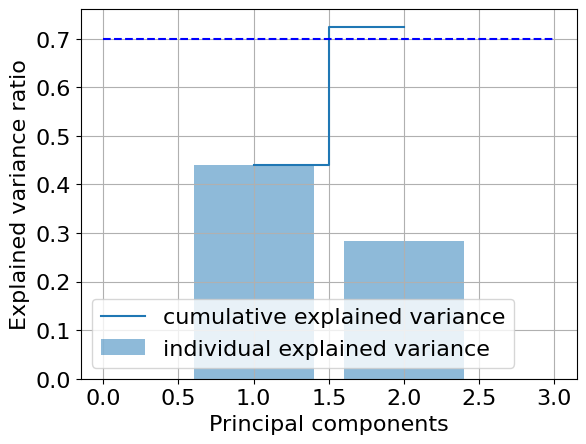

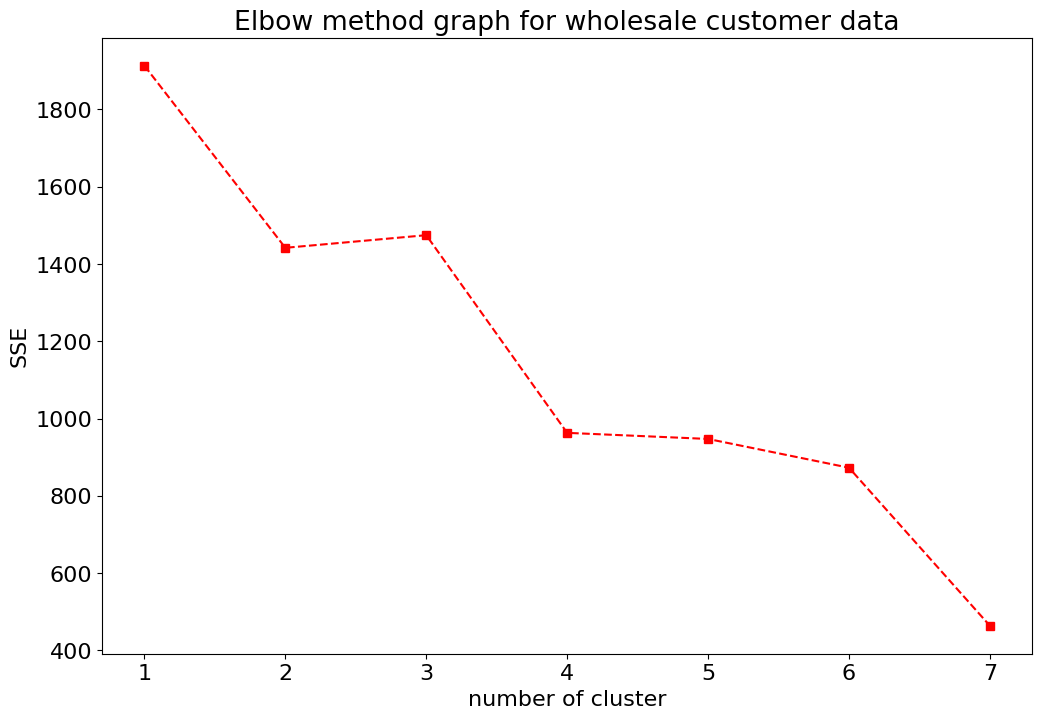

Elbow method graph for wholesale customer data 
   k =3 is most optimal. Because the bending of graph is occured at k = 3.


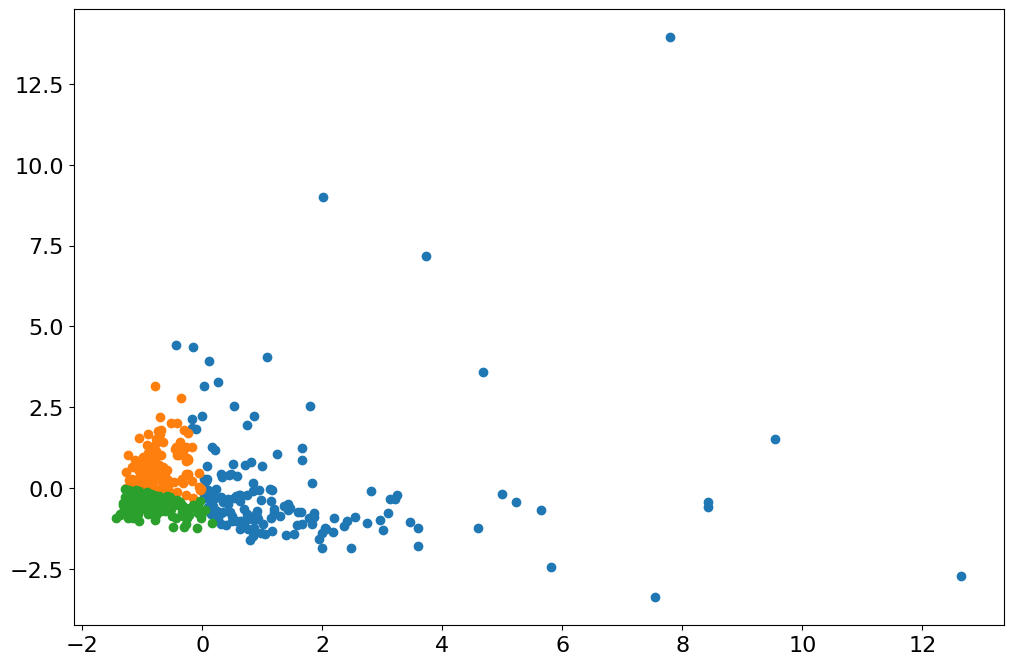

In [12]:
n = 2
pca = PCA(n_components=n)
pca = pca.fit(X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, n+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

pca_data = pca.transform(X)

elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,max_iter=100,verbose=False)
    model.fit(pca_data)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 16
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--')
plt.title("Elbow method graph for wholesale customer data")
plt.xlabel('number of cluster')
plt.ylabel("SSE")
plt.show()

print("Elbow method graph for wholesale customer data \n \
  k =3 is most optimal. Because the bending of graph is occured at k = 3.")


clf = ScratchKMeans(n_clusters=3,n_init=5,max_iter=100,verbose=False)
clf.fit(pca_data)
cluster = clf.y_km
data['cluster'] = cluster

pca_data_label = np.concatenate([pca_data, cluster.reshape(-1,1)], axis=1)

fig = plt.subplots(figsize=(12,8))
for i in range(clf.n_clusters):
  plt.scatter(pca_data_label[cluster==i,0], pca_data_label[cluster == i,1])
plt.show()

## [Problem 11] Comparison with known groups

/tmp/ipykernel_2211481/4056152854.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[feature])


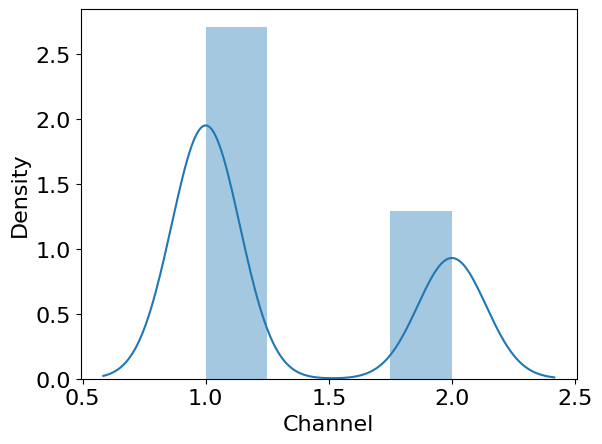

/tmp/ipykernel_2211481/4056152854.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[feature])


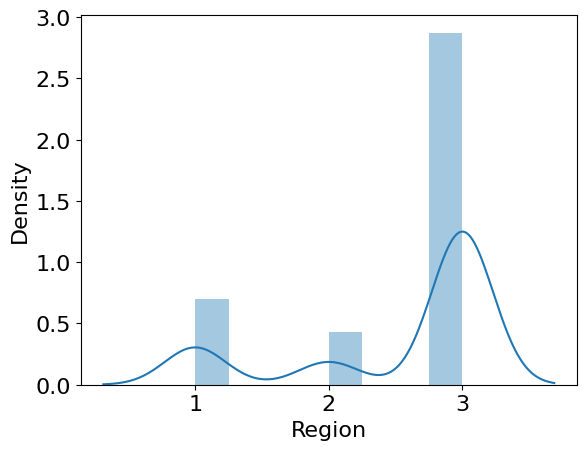

/tmp/ipykernel_2211481/4056152854.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[feature])


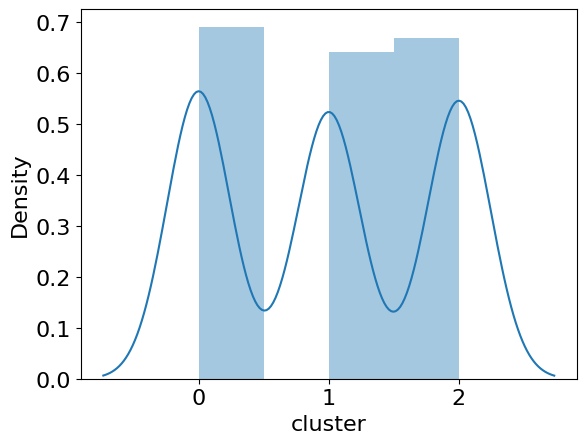

Channel and Region are separable 
   our identified cluster is much less separable.


In [13]:
feature = 'Channel'
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])
plt.show()

feature = 'Region'
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])
plt.show()

feature = 'cluster'
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])
plt.show()

print('Channel and Region are separable \n \
  our identified cluster is much less separable.')

## [Problem 12] Useful information for wholesalers

          Channel            Region                 Fresh              \
             mean max min      mean max min          mean     max min   
cluster                                                                 
0        1.769737   2   1  2.592105   3   1  11945.513158  112151  18   
1        1.078014   2   1  2.475177   3   1  18619.191489   56159   3   
2        1.095238   2   1  2.557823   3   1   5708.210884   18827   3   

                 Milk  ... Grocery       Frozen             Detergents_Paper  \
                 mean  ...     min         mean    max  min             mean   
cluster                ...                                                     
0        11727.039474  ...    1660  3484.809211  60869   25      6863.138158   
1         2749.794326  ...       3  4536.524823  16919  127       585.744681   
2         2585.891156  ...     137  1240.197279   5500   47       966.462585   

                     Delicassen             
           max min         mean    

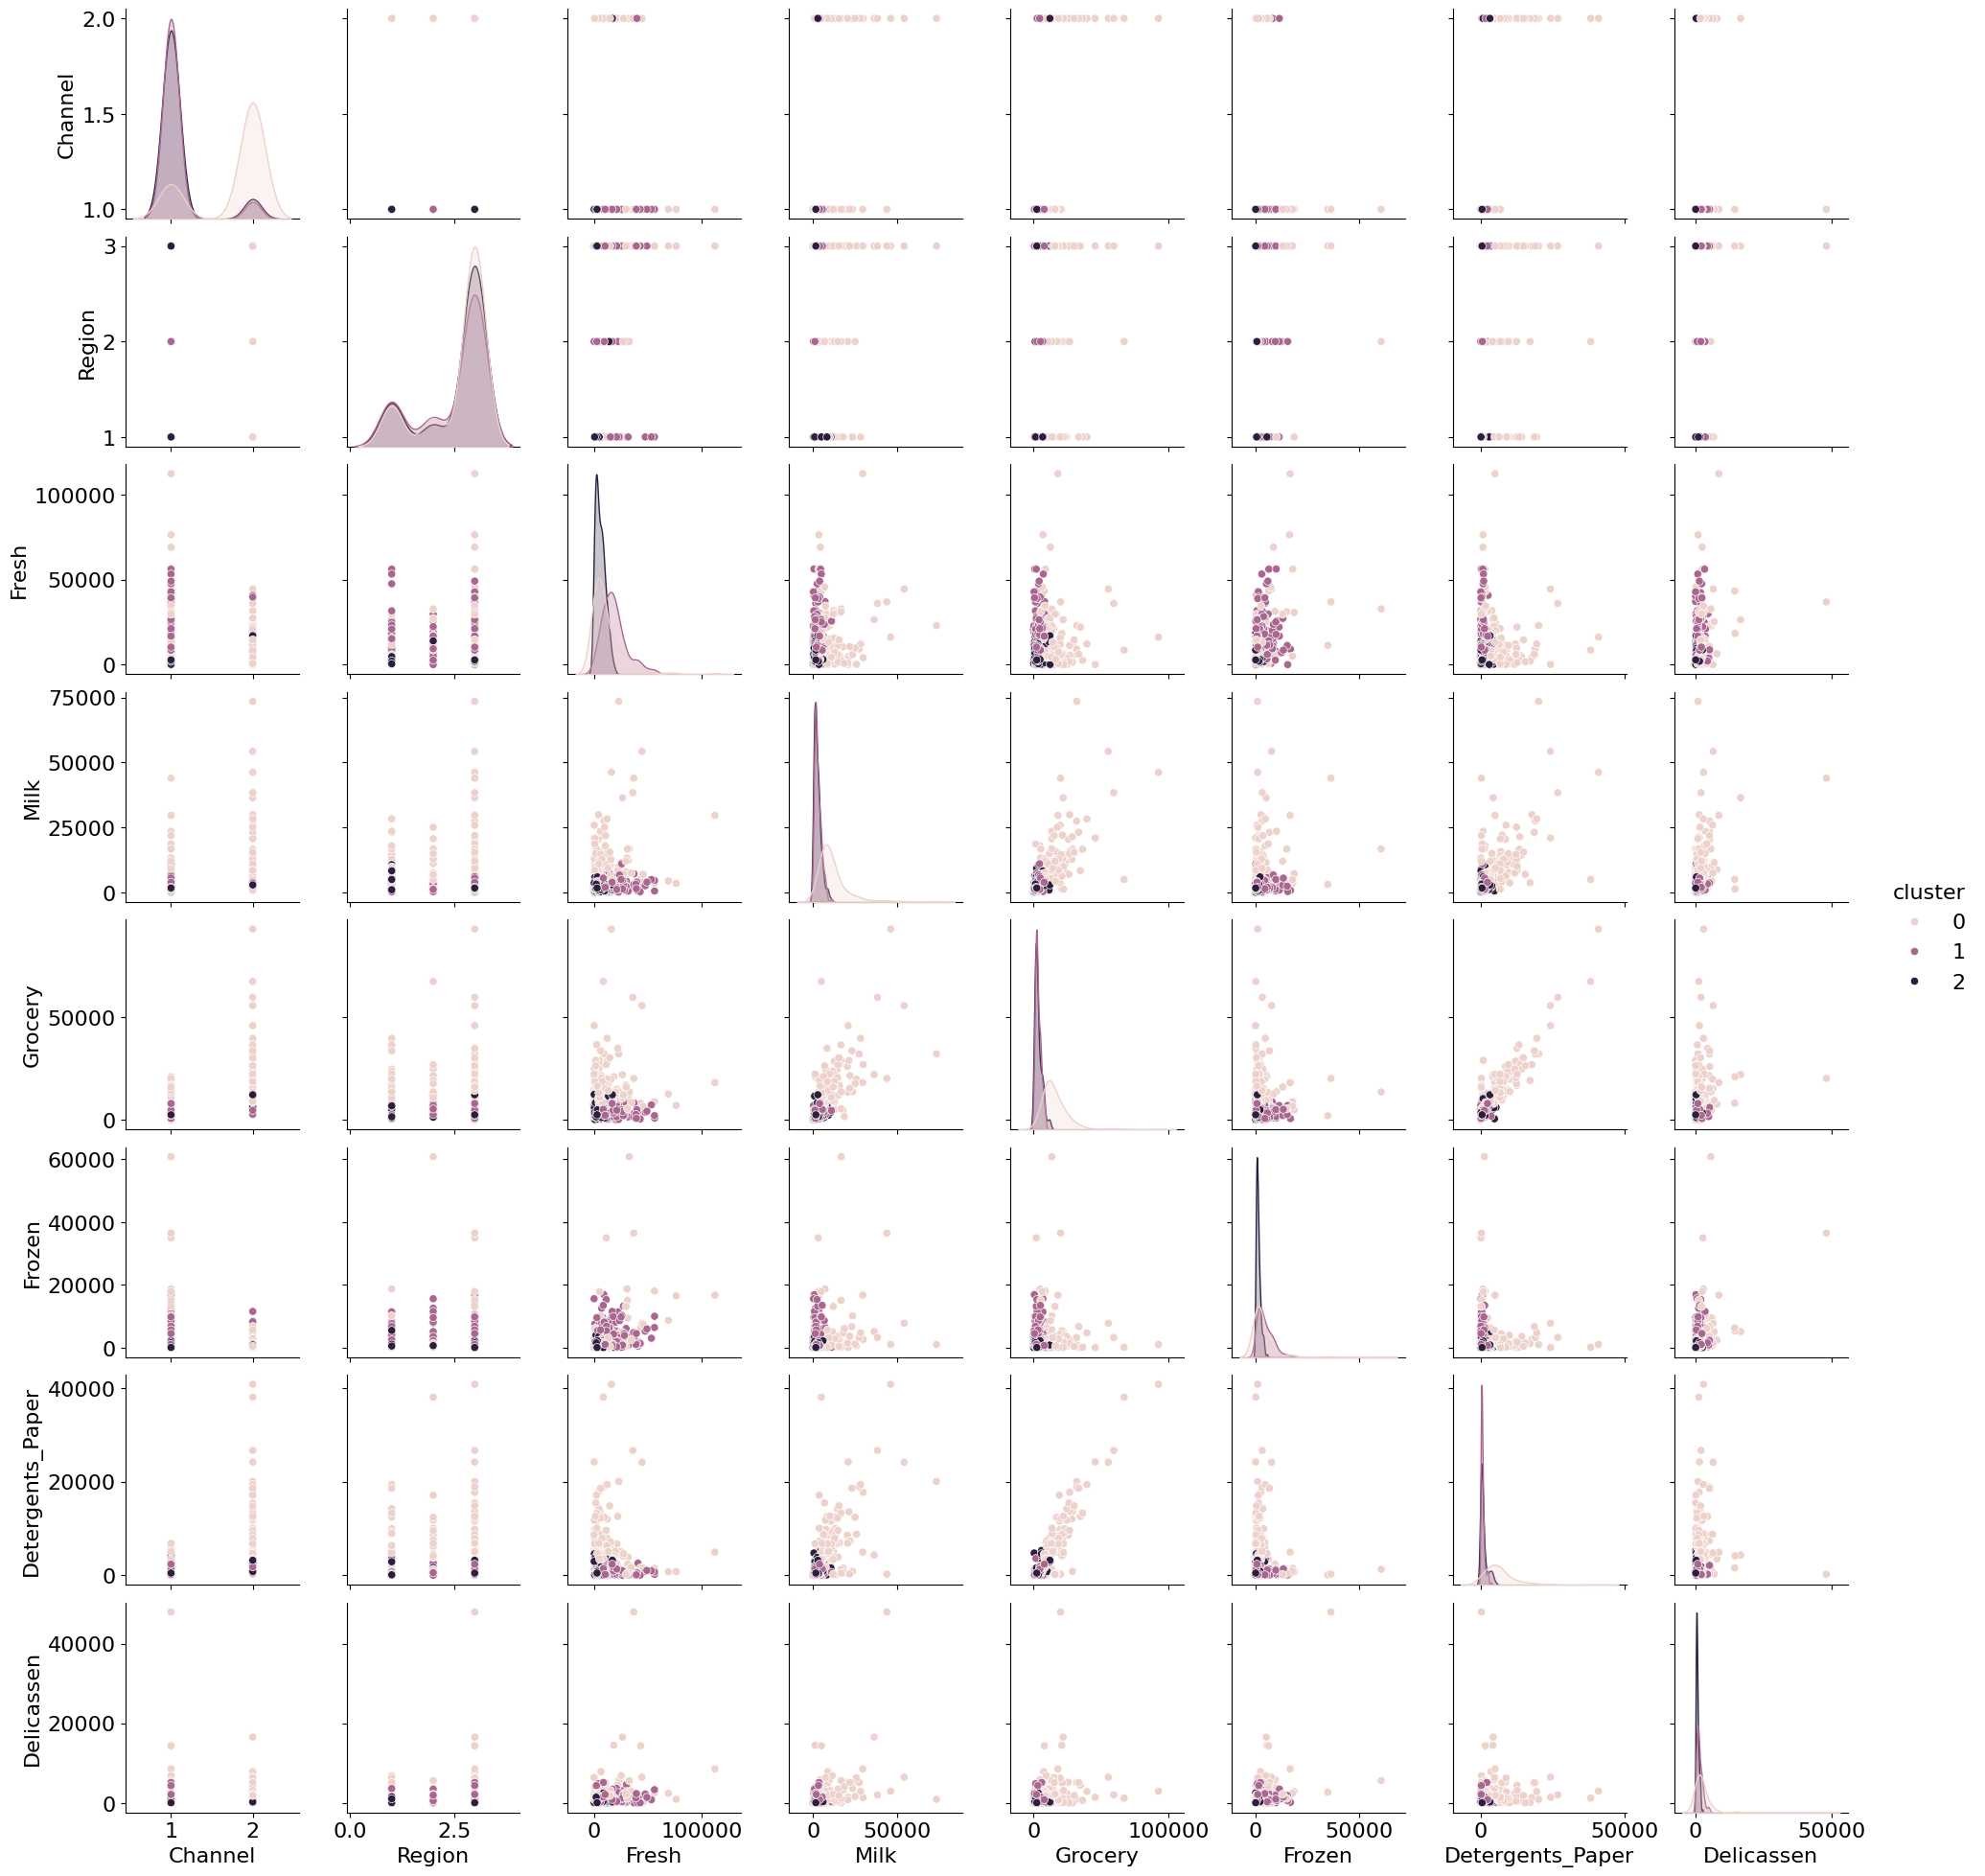

In [14]:
print(data.groupby('cluster').agg(['mean', 'max', 'min']))

sns.pairplot(data, hue = 'cluster')

## [Problem 13] (Advance assignment) Investigation of other methods

In [15]:
print('DBSCAN')
print("Advantages: - DBSCAN doesn't require to specify the number of cluster. \n \
    - Performs well with arbitrary shapes cluster. \n \
    - Robust to outliers and able to detect the outliers.")

print("Disadvantages: - Calculating distance of neighborhood is not easy and it requires domain knowledge.")

print('t-SNE')
print("Advantages: - Can work non linear data efficently whereas PCA is a linear algorithm. \n \
    - Preserves Local and Global Structure.")

print("Disadvantages: - Computationally complex \n \
  - Require hyperparameter tuning \n \
  - Noise patterns")

print('LLE')
print("Advantages: - Simple operation")

print("Disadvantages: - difficult to work large dataset")

DBSCAN
Advantages: - DBSCAN doesn't require to specify the number of cluster. 
     - Performs well with arbitrary shapes cluster. 
     - Robust to outliers and able to detect the outliers.
Disadvantages: - Calculating distance of neighborhood is not easy and it requires domain knowledge.
t-SNE
Advantages: - Can work non linear data efficently whereas PCA is a linear algorithm. 
     - Preserves Local and Global Structure.
Disadvantages: - Computationally complex 
   - Require hyperparameter tuning 
   - Noise patterns
LLE
Advantages: - Simple operation
Disadvantages: - difficult to work large dataset


## [Problem 14] (Advance assignment) Use of t-SNE and DBSCAN

X_sne.shape:(440, 2)
[ 0  1  2  3  4  0  5  1  5  1  1  5  0  0  0  5  1  6  0  5  0  3  7  8
  4  5  5  5  9  4  0  5  4  4  5  1  4  1  1  4  7  0  1  1  1  9  1  1
  1  1  3  5  4  1  4  5  1  1  5  1  5  1  1  1  3  1  1  0  3  5  3  8
  3  3  1  4  3  1  5  5  5  1  1  4  5  1  1  8  3  4  5  3  1 10  1  5
  1  5  5  3  1  1  1  4  5  5  1  1  1  1  5  1  3 11  4  5  5  5  4  3
  4  5  5  0  4  4  3  0  5  4  3  5  5  5  5  5  1  5  0  5  0 12  4  3
  5  1  5  5  3  4  5  5  4  5  5  1  1  4  1  1  1  5  4  1  1  1  1  5
  5  3  1  9  1  1  5  1  4  0  5  3  0  4  1  8  5  5  3  1  1  1  3  5
  5  1  5  3  3  1  5  5  1  1  4  5  5  1  5  1  1  1  4  1  5  1  1  1
  1  4  2  5  5  1  3  3  5  5  0  5 -1  3  3  5  4  5 11  5  5  4  5  4
  3  4  4  0  1  1  5  5  5  3  5  1  3  0 13  4  5  3  4  4  5  3  4  3
  1 13  1  4  1  5  3  5  5  4  5  5  4 10  3  0  5  0  4  3  4  4  5  3
  5  4  5  5  3  1  4  5  4  5  1  5  0  1  1  1  1  1  1  5  5  1 10  4
  1  3 -1  1  3  5  5  1  5  5

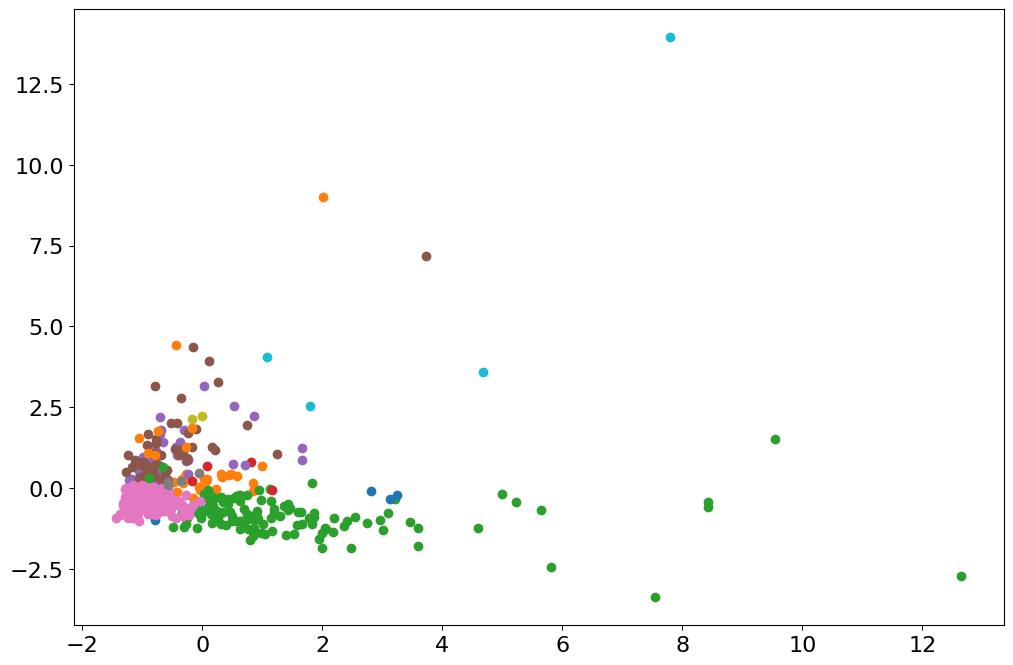

In [16]:
X_sne = TSNE(n_components=2, learning_rate='auto').fit_transform(X)
print('X_sne.shape:{}'.format(X_sne.shape))

db_scan = DBSCAN(eps = 2, min_samples=2).fit(X_sne)
print(db_scan.labels_)

lab = np.unique(db_scan.labels_)

fig = plt.subplots(figsize=(12,8))
for i in lab:
  plt.scatter(pca_data_label[db_scan.labels_ ==i,0], pca_data_label[db_scan.labels_ == i,1])
plt.show()